In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('..')

from Agents.ModelBasedSolvers import MdpFormulator
from Environment.EnvironmentSim import createEnv
from Configs import getSubAgentConfig, visualizeSubAgentConfig

In [2]:
configIdx = 1
subAgentParams = getSubAgentConfig(configIdx)
visualizeSubAgentConfig(subAgentParams)
trafficDataParentPath = f'../Datasets/TrafficDataset/TrafficData'
env = createEnv(subAgentParams, trafficDataParentPath)
env.selectMode(mode="train", type="data")

mdpFormulator = MdpFormulator(subAgentParams, env.trafficGenerator.getM(mode="train"))
mdpFormulator.aggregateModel(approximate=True)


Environment Configuration
Number of Users:        4
Window Length:          200
Dataflow:               thumb_bk
N_aggregation:          4
N_r:                    5
Resource Bar:           5
Bandwidth:              60
Sigmoid K List:         [0.3]
Sigmoid S List:         [10.0]
Random Seed:            999


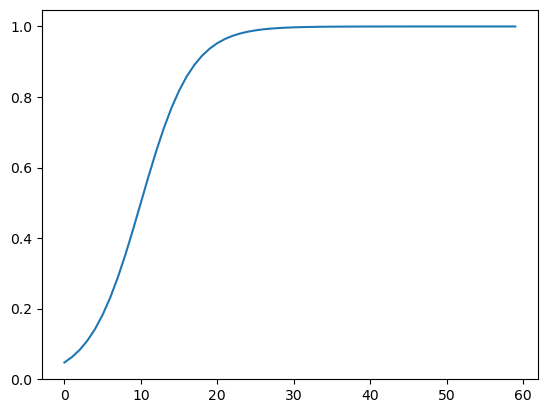

In [3]:
cdf = env.simulatorType1.wirelessModel.packetTransmissionCDF_list[0]
r_list = env.simulatorType1.wirelessModel.r_list
plt.plot(r_list, cdf)
plt.show()


In [5]:
for configIdx in [1]:
    subAgentParams = getSubAgentConfig(configIdx)
    visualizeSubAgentConfig(subAgentParams)
    trafficDataParentPath = f'../Datasets/TrafficDataset/TrafficData'
    env = createEnv(subAgentParams, trafficDataParentPath)
    env.selectMode(mode="train", type="data")

    mdpFormulator = MdpFormulator(subAgentParams, env.trafficGenerator.getM(mode="train"))
    mdpFormulator.aggregateModel(approximate=True)

    mdpKernel, mdpKernelParams = mdpFormulator.getMdpKernel()
    print(mdpKernel.rewardTable.shape)
    print(mdpKernel.transitionTable.shape)
    (V_deter, policy_deter) = mdpKernel.optimize_policy(mode="deterministic", max_iterations=1000)
    #(V_stoch, policy_stoch) = mdpKernel.optimize_policy(mode="stochastic", lr=10, max_iterations=80)
    mdpKernelParams['V_deter'] = V_deter
    mdpKernelParams['policy_deter'] = policy_deter  
    #mdpKernelParams['V_stoch'] = V_stoch
    #mdpKernelParams['policy_stoch'] = policy_stoch
    mdpKernelParams['V_stoch'] = None
    mdpKernelParams['policy_stoch'] = None


    with open(f'Agents/MdpPolicy/mdp_config{configIdx}.pkl', 'wb') as f:
        pickle.dump(mdpKernelParams, f)

    '''
    print(mdpFormulator.N_states)
    print(mdpFormulator.N_actions)
    print(mdpFormulator.N_states_original**mdpFormulator.N_user)
    print(mdpFormulator.N_states_original**mdpFormulator.N_user*mdpFormulator.N_actions)
    print(np.sum(mdpFormulator.M_aggregation, axis=1))
    print(mdpFormulator.M_aggregation.shape)
    '''

Environment Configuration
Number of Users:        4
Window Length:          200
Dataflow:               thumb_bk
N_aggregation:          4
N_r:                    5
Resource Bar:           5
Bandwidth:              60
Sigmoid K List:         [0.3]
Sigmoid S List:         [10.0]
Random Seed:            999
(256, 625)
(256, 256, 625)


Value Iteration:  64%|██████▎   | 637/1000 [03:22<01:55,  3.14it/s, V=16.890260]
